In [ ]:
# As players progress through the game Cookie Cats,they will encounter gates 
# The gates force them to wait a non-trivial amount of time or make an in-app purchase to progress
# These drive in app purchases and force the player to wait, hopefully increasing and prolonging their enjoyment
# Initially, the gates were placed at level 30
# We will analyse an A/B test where the first gate was moved to level 40 and study its impact on player retention
# The data we have is from 90,189 players that installed the game while the AB-test was running

In [1]:
# Importing pandas

import pandas as pd

# Reading in the data
df = pd.read_csv(r'C:\Users\suhasathreya\Downloads\cookie_cats.csv')

# Showing the first few rows

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
# Counting the number of players in each AB group to check if there are roughly the same in each group

df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Text(0, 0.5, 'rounds')

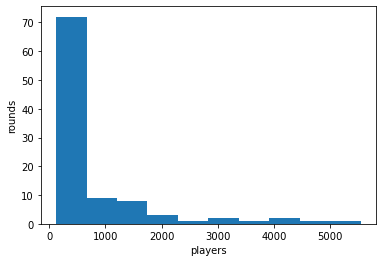

In [3]:
#There are roughly the same number of players in each group
#Let's plot the distribution of the number of game rounds players played during their first week playing the game

# This command makes plots appear in the notebook

%matplotlib inline

# Counting the number of players for each number of gamerounds 

plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds

ax = plot_df.head(n=100).plot(x='sum_gamerounds', y='userid', kind='hist')
ax.set_xlabel("players")
ax.set_ylabel("rounds")

In [4]:
# In the plot above we can see that some players install the game but then never play it (0 game rounds),
# some players just play a couple of game rounds in their first week, and some get really hooked
# examining the 1 day retention metric

# The % of users that came back the day after they installed

df['retention_1'].mean()

0.4452095044850259

In [5]:
# Calculating 1-day retention for each AB-group

df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

<AxesSubplot:ylabel='Density'>

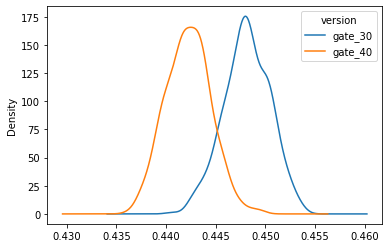

In [6]:
# Slight decrease in 1 day retention when gate is moved to level 40
# We will use bootstrapping to test for certainty

# Creating an list with bootstrapped means for each AB-group
#Note that in this notebook we have limited the number of bootstrap replication to 500 to keep the calculations quick. 
#In "production" we would likely increase this to a much larger number, say, 10 000

boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame

boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions

boot_1d.plot(kind='kde')

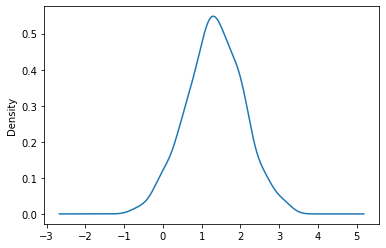

In [7]:
# Adding a column with the % difference between the two AB-groups

boot_1d['diff'] = (boot_1d['gate_30']-boot_1d['gate_40'])/boot_1d['gate_40']*100

# Ploting the bootstrap % difference

ax = boot_1d['diff'].plot(kind='kde')


In [8]:

# From this chart, we can see that the most likely % difference is around 1% - 2% in favor of a gate at level 30
# But what is the probability that the difference is above 0%?

# Calculating the probability that 1-day retention is greater when the gate is at level 30

prob = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

print(prob)

0.958


In [9]:
# Calculating 7-day retention for both AB-groups

df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

1.0


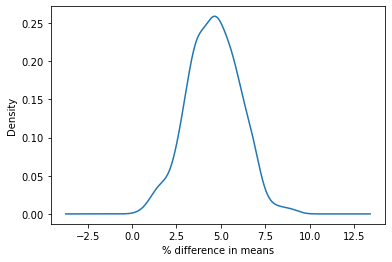

In [10]:
#Like with 1-day retention, 7-day retention is slightly lower (18.2%) when the gate is at level 40. 
#This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate. 
#We also see that the overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.
#But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.



# Creating a list with bootstrapped means for each AB-group

boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame

boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups

boot_7d['diff'] = (boot_7d['gate_30']-boot_7d['gate_40'])/boot_7d['gate_40']*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='kde')
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30

prob = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# printing the probability

print(prob)

In [ ]:
# So, given the data and the bootstrap analysis we should not move the gate to level 40